In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../input/titanic/train.csv")
df.shape


(891, 12)

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.count

<bound method DataFrame.count of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

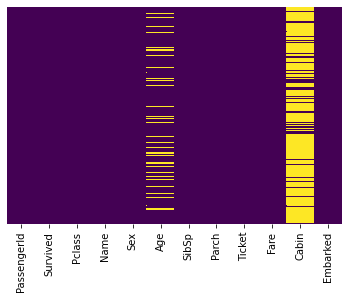

In [6]:
#So here we can see that Age and Cabin has a significant amount of null values.
#We can use a useful stuff from seaborn to visualize this.
sns.heatmap(df.isnull(),yticklabels= False, cbar = False, cmap = "viridis") #cbar 

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

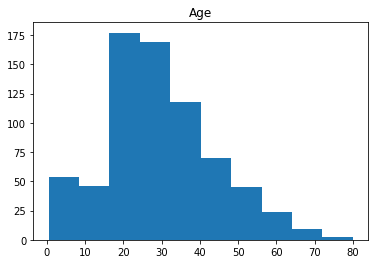

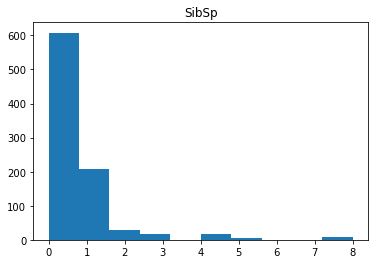

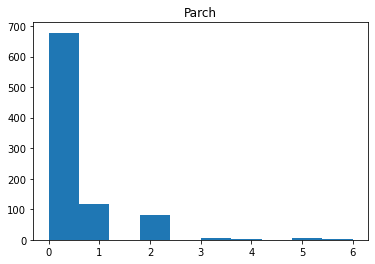

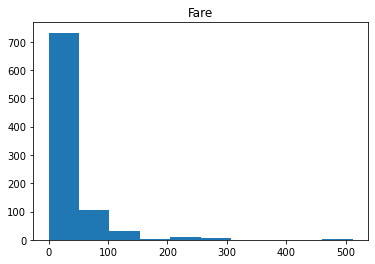

In [9]:
df_num = df[["Age", "SibSp", "Parch", "Fare"]]
for x in df_num.columns:
    plt.hist(df_num[x])
    plt.title(x)
    plt.show() #if show is not there only fare will appear

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

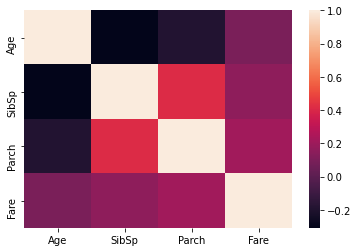

In [10]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [11]:
pd.pivot_table(df, index = "Survived", values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


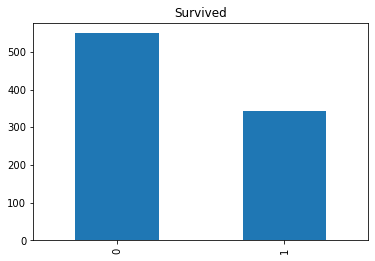

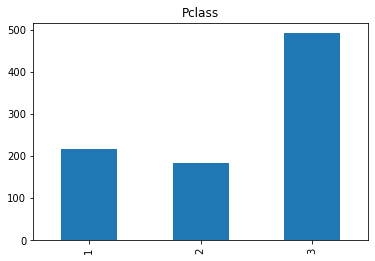

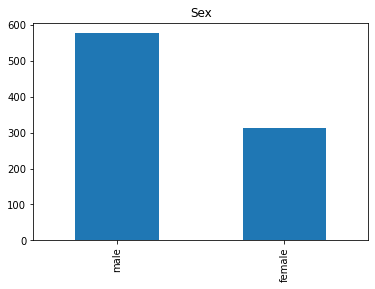

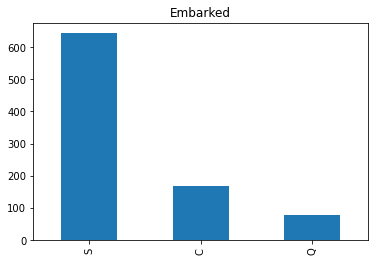

In [12]:
df_cat = df[['Survived','Pclass','Sex','Embarked']]
for y in df_cat.columns:
    df[y].value_counts().plot(kind='bar');
    plt.title(y)
    plt.show()

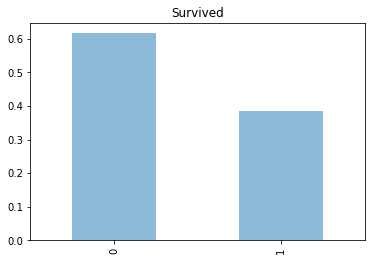

In [13]:
#how to show the above as percentage?

df.Survived.value_counts(normalize = True).plot(kind = "bar",alpha = 0.5) #ndex.value_counts() function returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.
plt.title("Survived")
plt.show()


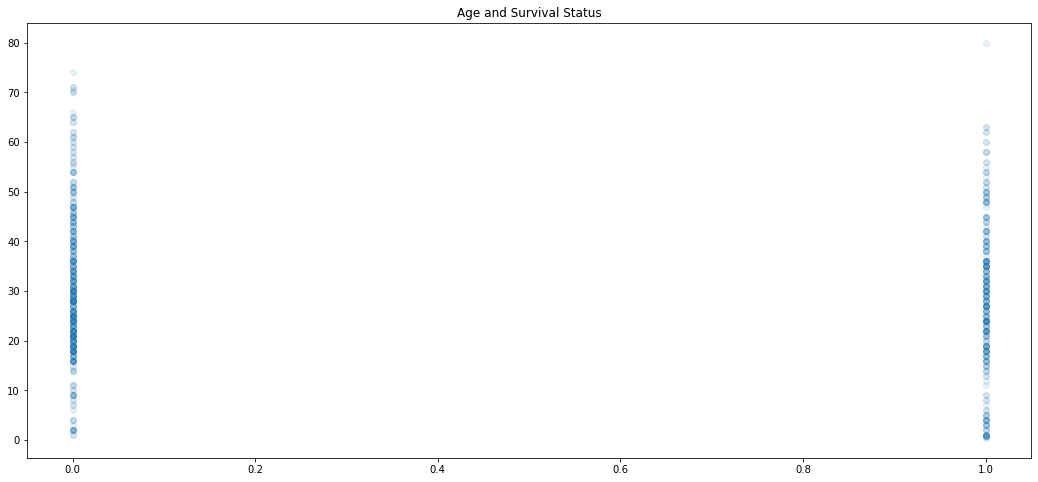

In [14]:
fig = plt.figure(figsize = (18,8))
plt.title("Age and Survival Status")
plt.scatter(df.Survived, df.Age, alpha = 0.1) #Matplotlib allows you to adjust the transparency of a graph plot using the alpha attribute. Greater the value less the transparency. Snce the dots lie on top of each other we want less transparency. 

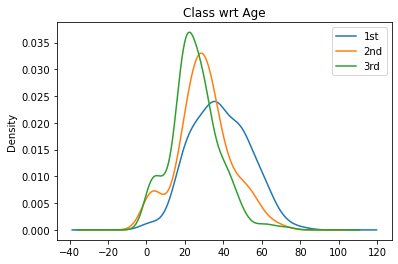

In [15]:
for x in [1,2,3]:
    df.Age[df.Pclass==x].plot(kind="kde")# first we make the plot then we add a titile and legend.
plt.title("Class wrt Age")
plt.legend(["1st","2nd","3rd"])

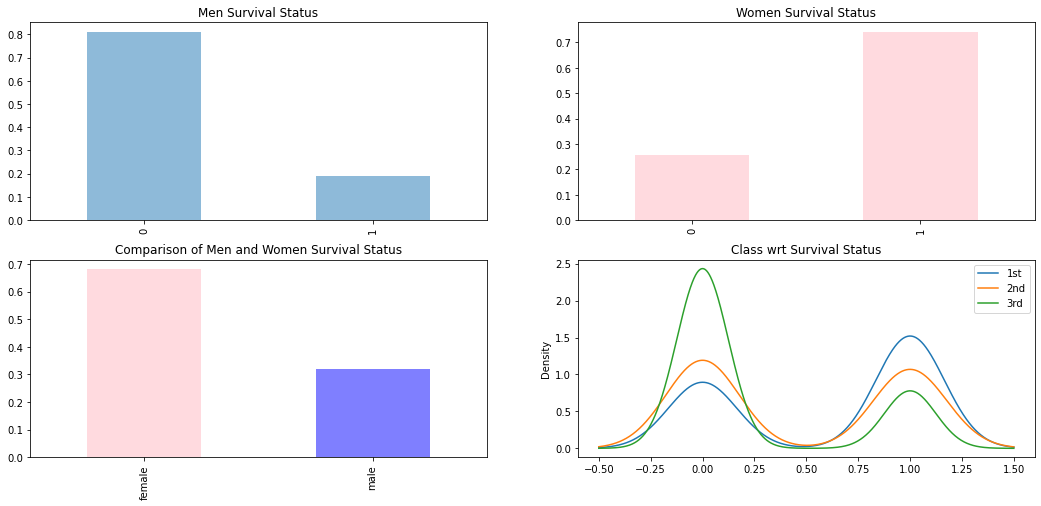

In [16]:
fig = plt.figure(figsize = (18,8)) 
plt.subplot (2,2,1)
df.Survived[df.Sex=="male"].value_counts(normalize = True).plot(kind = "bar",alpha = 0.5)
plt.title("Men Survival Status")
plt.subplot(2,2,2)
plt.title("Women Survival Status")
df.Survived[df.Sex=="female"].value_counts(normalize = True).plot(kind = "bar",alpha = 0.5, color = "#FFB6C1")
plt.subplot(2,2,3)
plt.title("Comparison of Men and Women Survival Status")
df.Sex[df.Survived == 1].value_counts(normalize = True).plot(kind = "bar",alpha = 0.5, color = ["#FFB6C1","b"])
plt.subplot(2,2,4)
for x in [1,2,3]:
    df.Survived[df.Pclass==x].plot(kind="kde")
plt.title("Class wrt Survival Status")
plt.legend(["1st","2nd","3rd"])
#Now we try to see if survival is affected by both class and sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

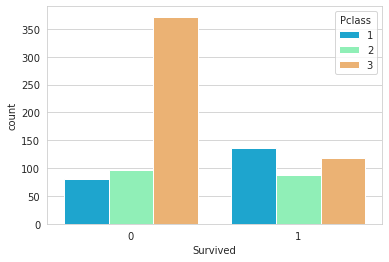

In [17]:
#Survival Status according to Passenger Class
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue = "Pclass", data = df, palette = "rainbow")

Text(0.5, 1.0, 'Survival Status when you are Male and Poor')

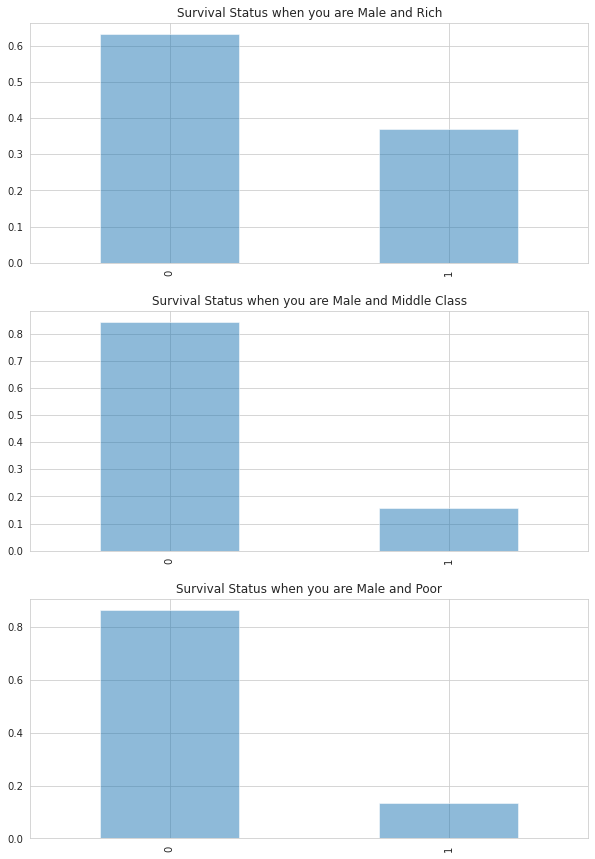

In [18]:
fig = plt.figure(figsize = (10,15))
plt.subplot (3,1,1)
df.Survived[(df.Sex=="male") & (df.Pclass == 1)].value_counts(normalize = True).plot(kind = "bar",alpha = 0.5)
plt.title("Survival Status when you are Male and Rich")
plt.subplot (3,1,2)
df.Survived[(df.Sex=="male") & (df.Pclass == 2)].value_counts(normalize = True).plot(kind = "bar",alpha = 0.5)
plt.title("Survival Status when you are Male and Middle Class")
plt.subplot (3,1,3)
df.Survived[(df.Sex=="male") & (df.Pclass == 3)].value_counts(normalize = True).plot(kind = "bar",alpha = 0.5)
plt.title("Survival Status when you are Male and Poor")

Text(0.5, 1.0, 'Survival Status when you are Female and Poor')

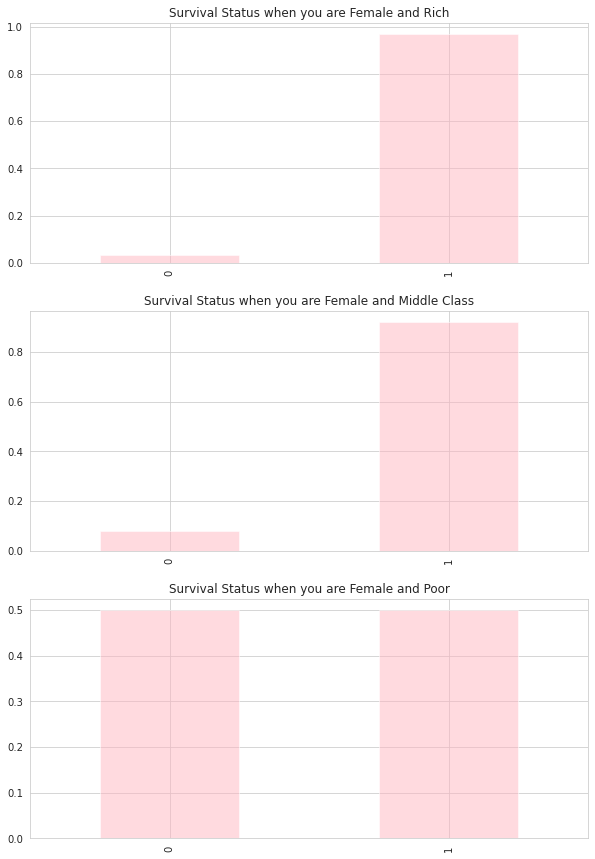

In [19]:
fig = plt.figure(figsize = (10,15))
plt.subplot (3,1,1)
df.Survived[(df.Sex=="female") & (df.Pclass == 1)].value_counts(normalize = True).plot(kind = "bar",alpha = 0.5, color = "#FFB6C1")
plt.title("Survival Status when you are Female and Rich")
plt.subplot (3,1,2)
df.Survived[(df.Sex=="female") & (df.Pclass == 2)].value_counts(normalize = True).plot(kind = "bar",alpha = 0.5,color = "#FFB6C1")
plt.title("Survival Status when you are Female and Middle Class")
plt.subplot (3,1,3)
df.Survived[(df.Sex=="female") & (df.Pclass == 3)].value_counts(normalize = True).plot(kind = "bar",alpha = 0.5,color = "#FFB6C1")
plt.title("Survival Status when you are Female and Poor")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

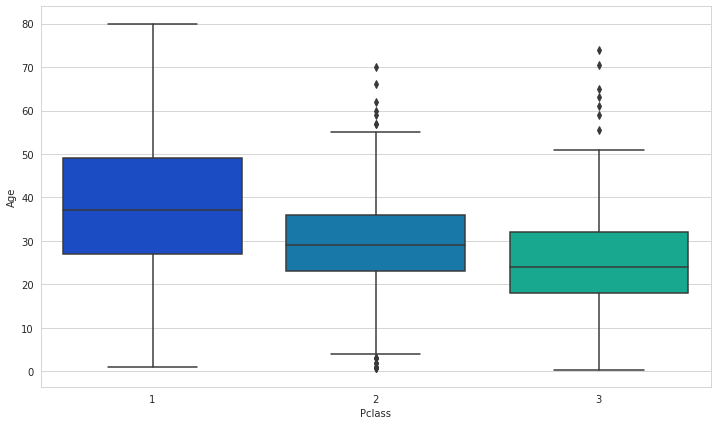

In [20]:
#Any relationship b/w age and passenger class?
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [21]:
#cleaning data
df["Fare"] = df["Fare"].fillna(df["Fare"].dropna().median())
df["Age"] = df["Age"].fillna(df["Age"].dropna().median())
df.loc[df.Sex=="male","Sex"] = 0
df.loc[df.Sex=="female","Sex"] = 1 
df["Embarked"] = df["Embarked"].fillna("S")
df.loc[df.Embarked=="S","Embarked"] = 0
df.loc[df.Embarked=="C","Embarked"] = 1
df.loc[df.Embarked=="Q","Embarked"] = 2

<AxesSubplot:>

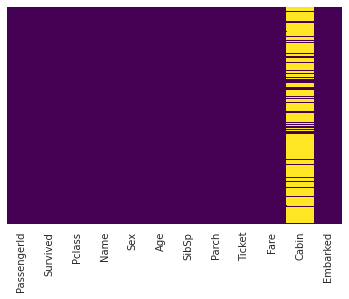

In [22]:
sns.heatmap(df.isnull(),yticklabels= False, cbar = False, cmap = "viridis")
# i just don't think cabin is useful. And since there are a lot of null values and to modify it I will have to use feature engineering and I don't know it much gonna drop it.

In [23]:
df.drop("Cabin", axis = 1, inplace = True)

<AxesSubplot:>

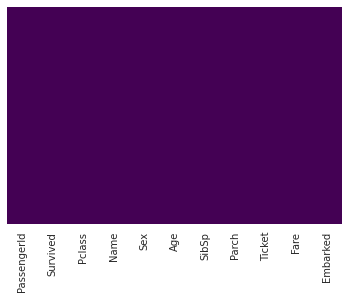

In [24]:
sns.heatmap(df.isnull(),yticklabels= False, cbar = False, cmap = "viridis")

In [25]:
df.drop(["Name", "Ticket"], axis = 1, inplace  = True)
#obviously name and ticket also plays no role in what we are going to predict.


In [26]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
5,6,0,3,0,28.0,0,0,8.4583,2
6,7,0,1,0,54.0,0,0,51.8625,0
7,8,0,3,0,2.0,3,1,21.0750,0
8,9,1,3,1,27.0,0,2,11.1333,0
9,10,1,2,1,14.0,1,0,30.0708,1


### Going to the training part

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state = 101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
predictions

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [28]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[134,  20],
       [ 40,  74]])

In [29]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7761194029850746

In [30]:
test = pd.read_csv("../input/titanic/test.csv")
test.head(10)
#We have to clean test like we did to df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [31]:
test.drop(["Name","Ticket","Cabin"],  axis = 1, inplace = True)


In [32]:
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
5,897,3,male,14.0,0,0,9.2250,S
6,898,3,female,30.0,0,0,7.6292,Q
7,899,2,male,26.0,1,1,29.0000,S
8,900,3,female,18.0,0,0,7.2292,C
9,901,3,male,21.0,2,0,24.1500,S


In [33]:
test["Fare"] = test["Fare"].fillna(test["Fare"].dropna().median())
test["Age"] = test["Age"].fillna(test["Age"].dropna().median())
test.loc[test.Sex=="male","Sex"] = 0
test.loc[test.Sex=="female","Sex"] = 1 
df["Embarked"] = df["Embarked"].fillna("S")
test.loc[test.Embarked=="S","Embarked"] = 0
test.loc[test.Embarked=="C","Embarked"] = 1
test.loc[test.Embarked=="Q","Embarked"] = 2
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
5,897,3,0,14.0,0,0,9.2250,0
6,898,3,1,30.0,0,0,7.6292,2
7,899,2,0,26.0,1,1,29.0000,0
8,900,3,1,18.0,0,0,7.2292,1
9,901,3,0,21.0,2,0,24.1500,0


<AxesSubplot:>

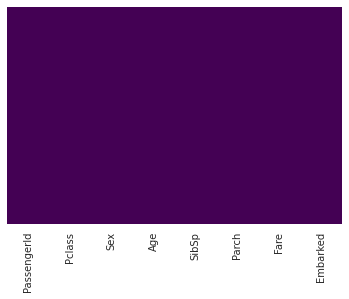

In [34]:
sns.heatmap(test.isnull(),yticklabels= False, cbar = False, cmap = "viridis")

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [36]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,0
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,0
416,1308,3,0,27.0,0,0,8.0500,0


In [37]:
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].dropna().median())

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 26.2+ KB


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [40]:
X_train = df.drop('Survived', axis=1)
y_train = df['Survived']
X_test = test
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
y_pred_log_reg



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [41]:
my_submission = pd.DataFrame({'PassengerId ': test.PassengerId, 'Survived': y_pred_log_reg})
my_submission.to_csv('submission.csv', index=False)
